<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C7/C7.html"><img src="../data/C7_nav.png" width="100"  style="float:right;" alt="C7"></a>
<h1>Content-Based Audio Retrieval</h1> 
</div>

<br/>

<p>
Following Chapter 7 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we give in this notebook an introduction to content-based audio retrieval. In particular, as described in Section 7.3, we discuss a retrieval scenario referred to as version identification. Parts of this notebook are inspired by the work by Joan Serrà. For an overview, we refer to the following articles.

<ul>
<li><span style="color:black">
Peter Grosche, Meinard Müller, and Joan Serrà: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2012_GroscheMuellerSerra_ContentBasedRetrieval_DagstuhlFU.pdf">Audio Content-Based Music Retrieval.</a></strong> In Meinard Müller and Masataka Goto and Markus Schedl (ed.): Multimodal Music Processing, Schloss Dagstuhl—Leibniz-Zentrum für Informatik, 3: 157–174, 2012.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_GroscheMS12_ContentBasedMusicRetrieval_DagstuhlFU.txt"> Bibtex </a>
</span></li>
    
<li><span style="color:black">
Michael A. Casey, Remco Veltkap, Masataka Goto, Marc Leman, Christophe Rhodes, and Malcolm Slaney: <strong>Content-Based Music Information Retrieval: Current Directions and Future Challenges.</strong> Proceedings of the IEEE, 96(4): 668&ndash;696, 2008.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_GroscheMS12_ContentBasedMusicRetrieval_DagstuhlFU.txt"> Bibtex </a>
</span></li>    
    
<li><span style="color:black">
Joan Serrà: <strong><a href="https://theses.eurasip.org/media/theses/documents/serra-joan-identification-of-versions-of-the-same-musical-composition-by-processing-audio-descriptions.pdf">Identification of versions of the same musical composition by processing audio descriptions.</a></strong> PhD Thesis, Universitat Pompeu Fabra, Barcelona, Spain, 2011.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_Serra11_VersionIdentification_Thesis.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 

## Introduction

The revolution in music distribution and storage brought about by digital technology has fueled tremendous interest in and attention to the ways that information technology can be applied to this kind of content. The general field of **information retrieval** (IR) is devoted to the task of organizing information and of making it accessible and useful. An information retrieval process begins when a user specifies his/her information needs by means of a **query**. The retrieval system should then deliver from a given data collection all **documents** or **items** that are somehow related to the query.

Most of the available services for music recommendation and playlist generation rely on metadata and textual annotations of the actual audio content. For example, a music recording may be described by the name of the artist or composer, the title of the piece, or the song lyrics&mdash;editorial data that is typically created manually by domain experts. Recent retrieval systems complement editorial metadata with general and expressive annotations, which are also referred to as **tags**. Such tags may describe the musical style or genre of a recording, and also include information about the mood, the musical key, or the tempo. Many music recommendation systems rely on a large number of tags that have been generated by different users, automatically extracted from music blogs, and enriched by statistical information on user behavior and music consumption. Even though such tags may be quite noisy, they still express certain general trends and describe the music content in a statistical and human-centered way. 

While **text-based** retrieval systems can be very powerful, they require the audio material to be enriched with suitable metadata&mdash;an assumption that is often not valid, in particular for less popular music or music material that is scattered in unstructured data collections. Furthermore, not all retrieval scenarios can be handled by a purely text-based approach. How should a retrieval system be designed if the user's query consists of a short excerpt of a CD recording or a melody sung into a microphone? What can be done if only a few measures of a musical score are available?
How can a user be satisfied if he or she looks for music with a specific rhythmic pattern or harmonic progression which have not been annotated? To handle such scenarios, one requires **content-based retrieval** systems that only make use of the raw music data, rather than relying on manually generated metadata. The term **content** loosely refers to any kind of information that can be directly derived from the music material to be queried, compared, and retrieved.

<img src="../data/C7/FMP_C7_F01_text.png" width="500px" align="middle" alt="FMP_C7_F01_text.png">

## Query-By-Example

Many content-based retrieval strategies follow the **query-by-example** paradigm: given a music representation or a fragment of it (used as a query or example), the task is to automatically retrieve documents from a music collection containing parts or aspects that are similar to the query. We give three examples of three content-based retrieval tasks based on this paradigm. 

* Given a small audio fragment as query, the task of [**audio identification**](../C7/C7S1_AudioIdentification.html) (sometimes also called **audio fingerprinting**) consists in identifying the particular audio recording that is the source of the query. For example, given a small excerpt of the Bernstein recording (1962) of Beethoven's Symphony No. 5, the objective is to exactly identify this recording. 

* Fingerprinting systems would not be able to identify other recordings of the same piece such as the one by Karajan (1982). This exactly is the objective of a retrieval task called [**audio matching**](../C7/C7S2_AudioMatching.html): Given a query fragment, the goal of audio matching is to retrieve all audio excerpts that musically correspond to the query. In this scenario, one explicitly allows semantically motivated variations as they typically occur in different performances and arrangements of a piece of music. 

* Further softening the notion of similarity, the task of [**version identification**](../C7/C7S3_VersionIdentification.html) (sometimes also called **cover song retrieval**) deals not only with performance variations in instrumentation and tempo, but also with more extreme variations concerning the musical structure, key, or melody, as typically occur in remixes and cover songs. 

* Finally, in **category-based** retrieval scenarios (including **genre classification**), the similarity relationships are rather vague and express cultural or musicological categories. 

<img src="../data/C7/FMP_C7_F01_BeetFifth.png" width="380px" align="left" alt="FMP_C7_F01_BeetFifth.png">
<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">Metadata</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Bernstein)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Beethoven_Op067-01-001-021_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Karajan)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Beethoven_Op067-01-001-021_Karajan.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 5<br> (Gould)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Beethoven_Op067-01-001-021_Gould.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 9<br> (Bernstein)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Beethoven_Op125-02_Bernstein.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Beethoven: <br>Symphony No. 3<br> (Blomstedt)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Beethoven_Op055-01_Blomstedt.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">Haydn: <br>Symphony No. 94</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_F01_Haydn_H1-94-01.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
</table>

## Specificity and Granularity

Content-based retrieval strategies can be loosely classified according to their **specificity** and **granularity**. 

* The **specificity** of a retrieval system refers to the degree of similarity between the query and the database documents to be retrieved. Highly specific retrieval systems return exact or near copies of the query, whereas low-specific retrieval systems return semantically related matches that, from a numerical point of view, may be quite different from the original query. 

* The **granularity** refers to the temporal level considered in the retrieval scenario. In **fragment-level** retrieval scenarios, the query consists of a short fragment of an audio recording, and the goal is to retrieve all related fragments that are contained in the database documents. For example, such fragments may cover a few seconds of audio content or may correspond to a motif, a theme, or a musical part. In contrast, in **document-level** retrieval, the query reflects characteristics of an entire document and is compared with entire documents of the database. In this case, the notion of similarity tends to be coarser, even though the global similarity score may still be based on a local, fragment-level comparison. 

The various content-based retrieval scenarios may be loosely arranged in a **specificity&ndash;granularity plane** according to the specificity and granularity. In the following figure, the three scenarios considered in Chapter 7 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a> (audio identification, audio matching,
and version identification) are represented by clouds, which enclose a number of related retrieval scenarios. A fourth cloud that represents **category-based** retrieval scenarios has been added. Even though this taxonomy may be too simplistic, it gives an intuitive overview of various retrieval paradigms while illustrating their subtle but crucial differences. 

<br clear="all" />

<img src="../data/C7/FMP_C7_F22_small.png" width="600px" align="middle" alt="FMP_C7_F2_small.png">

## Versions in Music

In Western culture, when speaking of a **piece of music**, one typically thinks of a specific composition given in music notation or given in the form of a recorded track. Often, the origin of a piece of music can be traced back and associated to the name of a composer or a music group. For example, the musical score written down by Ludwig van Beethoven is considered the original version of the Fifth Symphony. Or the original version of the song "Yellow Submarine" is without question the recording by the English rock band "The Beatles." For music in general, however, this view is somewhat simplistic and using the term "piece of music"&mdash;not to mention the term "original version"&mdash;may be problematic. In the following, we adopt a simplistic point of view and use the terms "piece of music" and "version" in a rather loose way. Instead of trying to give a formal definition of these terms, let us consider some typical examples in the context of Western music.  

* An **arrangement** refers to a reworking of a piece of music so that it can be played by instruments different from the ones notated in the original score.
* A **piano transcription** is an arrangement of symphonic and chamber music so that it can be played on one or two pianos.
* A **quodlibet** (as composed in the 15th century) refers to a piece of music where different melodies, usually popular folk tunes, are combined in an often humorous manner.
* A **potpourri** (as composed in the 19th century) is a piece where individual sections of popular operas, operettas, or songs are simply juxtaposed with no strong connection or relationship. 
* A **medley** is a piece composed from parts of existing pieces, typically the most memorable parts of songs, played one after another, sometimes overlapping. 
* A **DJ mix** is a version where a DJ acts as performing musicians by manipulating, blending, and mixing existing audio material, e.g., by applying  turntable scratching to create percussive sounds mixed into the original recordings.
* **Sampling** refers to the technique of taking portions, or samples, of one recording and reusing them as a "new" instrument in a different piece.
* A **remix** is a recording that has been edited or completely recreated to sound different from the original version. Such modifications may range from changes in dynamics, pitch, tempo, and playing time to complete rearrangements of voices and instrumental tracks.
* In **remastering** the goal is to enhance the sound quality of a previously existing recording.
* A **mashup** is a new composition which is created by overlaying the vocal track of one song seamlessly over the instrumental track of another.
* A **sound collage** is a composition obtained by combining portions of existing  recordings or pieces of music&mdash;similar to a collage in the visual arts, where portions of other artwork or texts, photographs, and other found objects are glued to a piece of paper or canvas.
* A **quotation** refers to the usage of existing musical material such as a melody or theme in 
a new composition.
* One speaks of a **variation** when musical material is repeated in an altered form with changes that may involve harmony, melody, rhythm, timbre, orchestration or any combination of these.
* A **parody** imitates an original work in a ridiculing and trivializing way. 
* A **cover version** or **cover song** loosely refers to a new performance of a previously released song by someone other than the original artist. 

These are just some example of what one may understand by "versions" of a piece of music. A version may differ from the original recording in many ways, possibly including significant changes in timbre, instrumentation, tempo, key, harmony, melody, lyrics, and musical structure. For example, when looking for versions of Beethoven's Fifth Symphony, one may be interested in retrieving a live performance played by a rock band, where many notes have been modified and most of the original structure has been lost. Despite radical changes in tone and tempo, one may still recognize the original composition by means of characteristic melodic, harmonic, or rhythmic elements of the original composition that shine through in the modified version.

Beethoven Symphony Rock Cover (and other pieces)


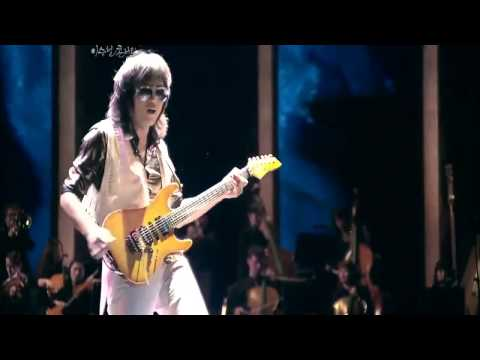

In [1]:
import IPython.display as ipd
import numpy as np
print('Beethoven Symphony Rock Cover (and other pieces)')
ipd.display(ipd.YouTubeVideo('wWrgyNMLVxw', start=1, width=400, height=300))

In [2]:
print('Walter Murphy: A Fifth Of Beethoven')
ipd.display(ipd.YouTubeVideo('4MFbn8EbB4k', start=0, width=400, height=300))

Walter Murphy: A Fifth Of Beethoven


Here are some further examples of **cover songs** that indicate the kind of modifications that may occur.

<!--<img src="../data/C7/FMP_C7_CoverSongs.png" width="500px" align="middle" alt="FMP_C7_CoverSongs.png">-->

<br clear="all" />

<table style="border:none;text-align:left;">
   <tr>
      <th style="width:15%; border:none;text-align:left;">Song Name</th>
      <th style="width:20%; border:none;text-align:left;">Original Version</th>
      <th style="width:10%; border:none;text-align:left;"><strong><font color="red">Modification</font></strong></th>        
      <th style="width:20%; border:none;text-align:left;">Cover Version</th>
      <th style="width:15%; border:none;text-align:left;">Song Name</th>       
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Bob Dylan: Knockin' On Heaven's Door</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_CoverSongs/FMP_C7_KnockingOnHeavensDoor_BobDylan.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;"><strong><font color="red">Key</font></strong></td>    
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_CoverSongs/FMP_C7_KnockingOnHeavensDoor_AvrilLavigne.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;">Avril Lavigne: Knockin' On Heaven's</td>    
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">Metallica: Enter Sandman</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_CoverSongs/FMP_C7_EnterSandman_Metallica.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
      <td style="border:none;text-align:left;"><strong><font color="red">Timbre</font></strong>   
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;" src="../data/C7/FMP_C7_CoverSongs/FMP_C7_EnterSandman_Apocalyptica.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
     <td style="border:none;text-align:left;">Apocalyptica: Enter Sandman</td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Nirvana: Poly (Incesticide Album)</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_Poly_Incesticide.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Tempo</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_Poly_Unplugged.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">Nirvana: Poly (Unplugged)</td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">Black Sabbath: Paranoid</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_Paranoid_BlackSabbath.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Lyrics</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_Paranoid_CindyBert.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">Cindy & Bert: Der Hund von Baskerville</td>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">AC/DC: High Voltage</td>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_HighVoltage_ACDC.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;"><strong><font color="red">Recording conditions</font></strong>
      <td style="border:none;text-align:left;">
         <audio style="width: 150px;"  src="../data/C7/FMP_C7_CoverSongs/FMP_C7_HighVoltage_ACDC-live.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
    <td style="border:none;text-align:left;">AC/DC: High Voltage (live)</td>
   </tr>   
   

</table>

This overview only gives a glimpse of the various notions that exist to refer to versions that can be associated to an original musical work. Nowadays, with the availability of personal digital technology for distributing, recording, and processing audio material, semiprofessional music bands and amateurs can easily produce their own music&mdash;often on the basis of existing songs and audio material. For many songs such as "Summertime" by George Gershwin or "Yesterday" by The Beatles one can find hundreds of versions on video-sharing websites such as YouTube&mdash;some of them having millions of clicks. Of course, the imitation, manipulation, and modification of existing artworks to create new versions is not limited to music. Principles based on quotation, parody, translation, and plagiarism can be found in literature, painting, sculpture or photography. The following figure, which has been inspired by <a href="https://theses.eurasip.org/media/theses/documents/serra-joan-identification-of-versions-of-the-same-musical-composition-by-processing-audio-descriptions.pdf">Joan Serrà's PhD Thesis</a> illustrates this by means of the painting "Mona Lisa" by Leonardo da Vinci. 

<br clear="all" />

<img src="../data/C7/FMP_C7_F17.png" width="500px" align="middle" alt="FMP_C7_F17.png">

## Further Notes

In the subsequent notebooks of this chapter, we cover three content-based audio retrieval scenarios. Motivated by these scenario, we discuss general matching and alignment techniques that may be applicable for a wide range of multimedia content beyond music.

* [Audio identification](../C7/C7S1_AudioIdentification.html): Fingerprinting techniques

* [Audio matching](../C7/C7S2_AudioMatching.html): Subsequence dynamic time warping techniques

* [Version identification](../C7/C7S3_VersionIdentification.html): Common subsequence matching techniques

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>